# Import Libraries

In [1873]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [1741]:
credit_df=pd.read_csv('creditcard.csv')

In [1742]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [1743]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [1744]:
#don't remove duplicate as column values are different
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [1745]:
#check duplicated data
credit_df[credit_df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [1746]:
credit_dropdup=credit_df.drop_duplicates(keep='first')
credit_dropdup.shape

(283726, 31)

In [1747]:
credit_df.shape

(284807, 31)

In [1748]:
credit_df.corr()['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_91056/158310281.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_df['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

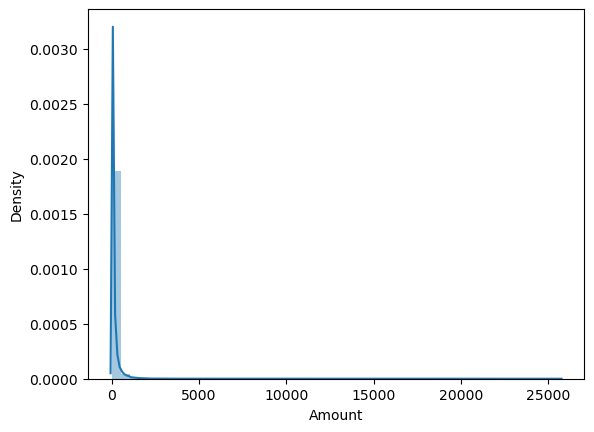

In [1749]:
sns.distplot(credit_df['Amount'])

/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_91056/738905454.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_df[credit_df['Class']==0]['Amount'],hist=False,color='green')
/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_91056/738905454.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

<Axes: xlabel='Amount', ylabel='Density'>

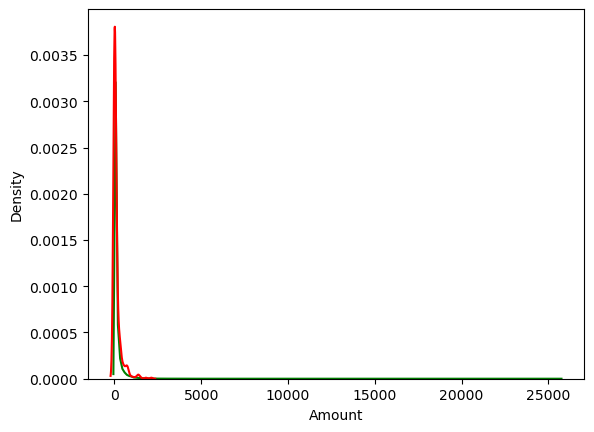

In [1750]:
sns.distplot(credit_df[credit_df['Class']==0]['Amount'],hist=False,color='green')
sns.distplot(credit_df[credit_df['Class']==1]['Amount'],hist=False,color='red')

/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_91056/2667473102.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_df[credit_df['Class']==0]['Time'],hist=False,color='green')
/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_91056/2667473102.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

<Axes: xlabel='Time', ylabel='Density'>

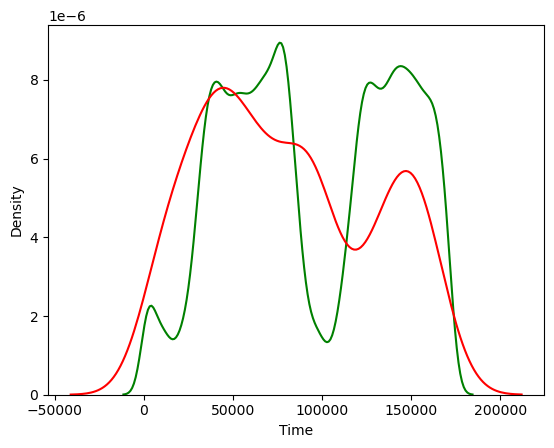

In [1751]:
sns.distplot(credit_df[credit_df['Class']==0]['Time'],hist=False,color='green')
sns.distplot(credit_df[credit_df['Class']==1]['Time'],hist=False,color='red')

In [1752]:
#data is biased
credit_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_91056/1934347886.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_df)


<Axes: ylabel='Density'>

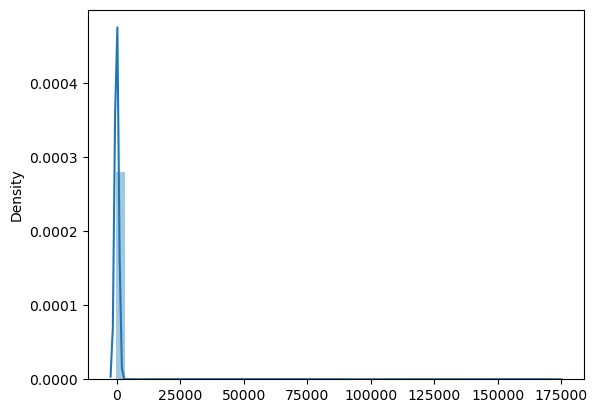

In [1753]:
sns.distplot(credit_df)

/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_91056/2390065818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_df['Time'])


<Axes: xlabel='Time', ylabel='Density'>

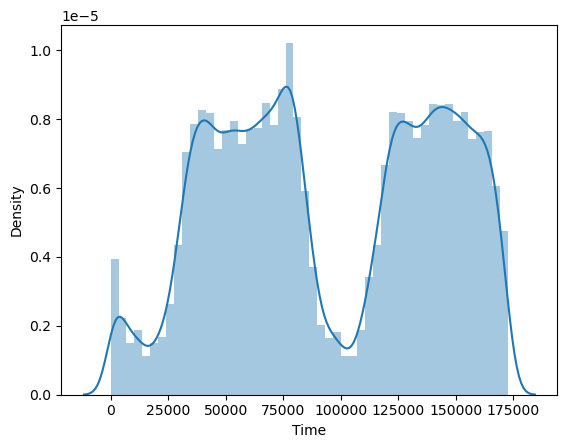

In [1754]:
sns.distplot(credit_df['Time'])

<Axes: xlabel='Amount', ylabel='Time'>

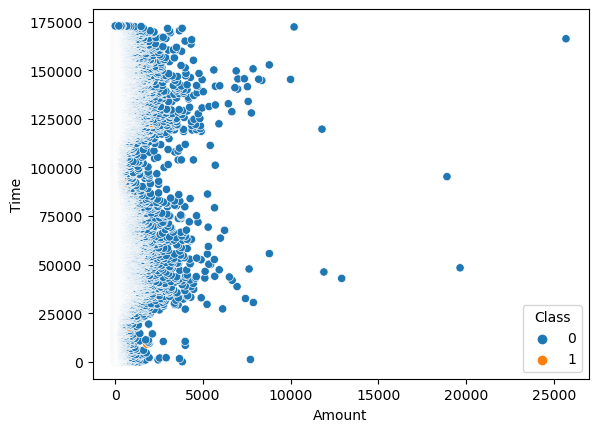

In [1755]:
sns.scatterplot(credit_df,x='Amount',y='Time',hue='Class')

<Axes: ylabel='Amount'>

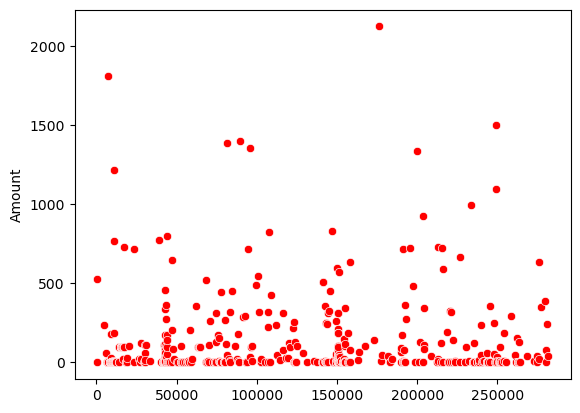

In [1756]:
sns.scatterplot(credit_df[credit_df['Class']==1]['Amount'],color='red')


<Axes: ylabel='Amount'>

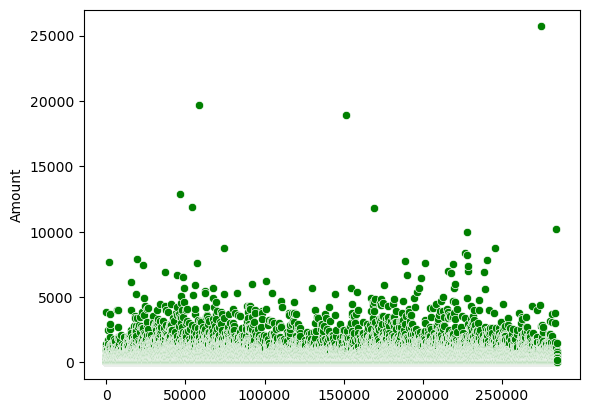

In [1757]:
sns.scatterplot(credit_df[credit_df['Class']==0]['Amount'],color='green')

/Users/anubhoyar/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Amount', ylabel='Time'>

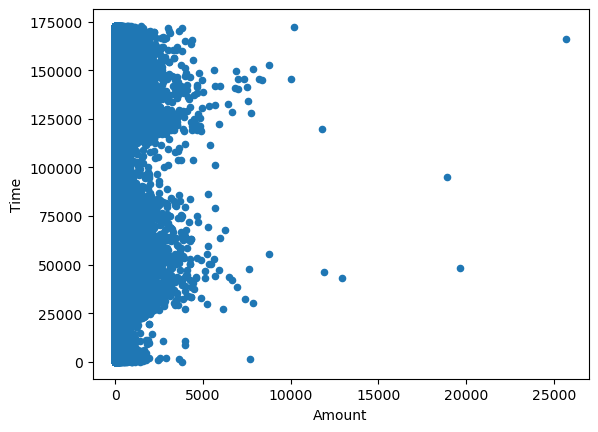

In [1758]:
credit_df.plot.scatter(x='Amount',y='Time')

In [1916]:
# plt.scatter(credit_df['Amount'],credit_df['Time'],c=credit_df['Class'])

In [1760]:
frd_amt=credit_df[credit_df['Class']==1]['Amount']
nfrd_amt=credit_df[credit_df['Class']==0]['Amount']
len(frd_amt),len(nfrd_amt)

(492, 284315)

# Histogram of fraud and normal transactions

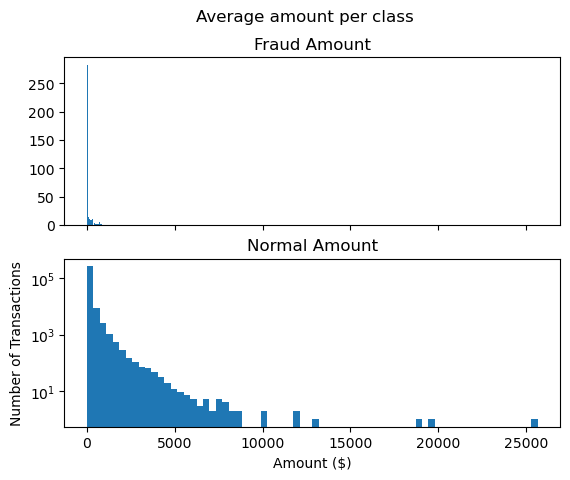

In [1761]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(frd_amt, bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(nfrd_amt , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

# Heatmap

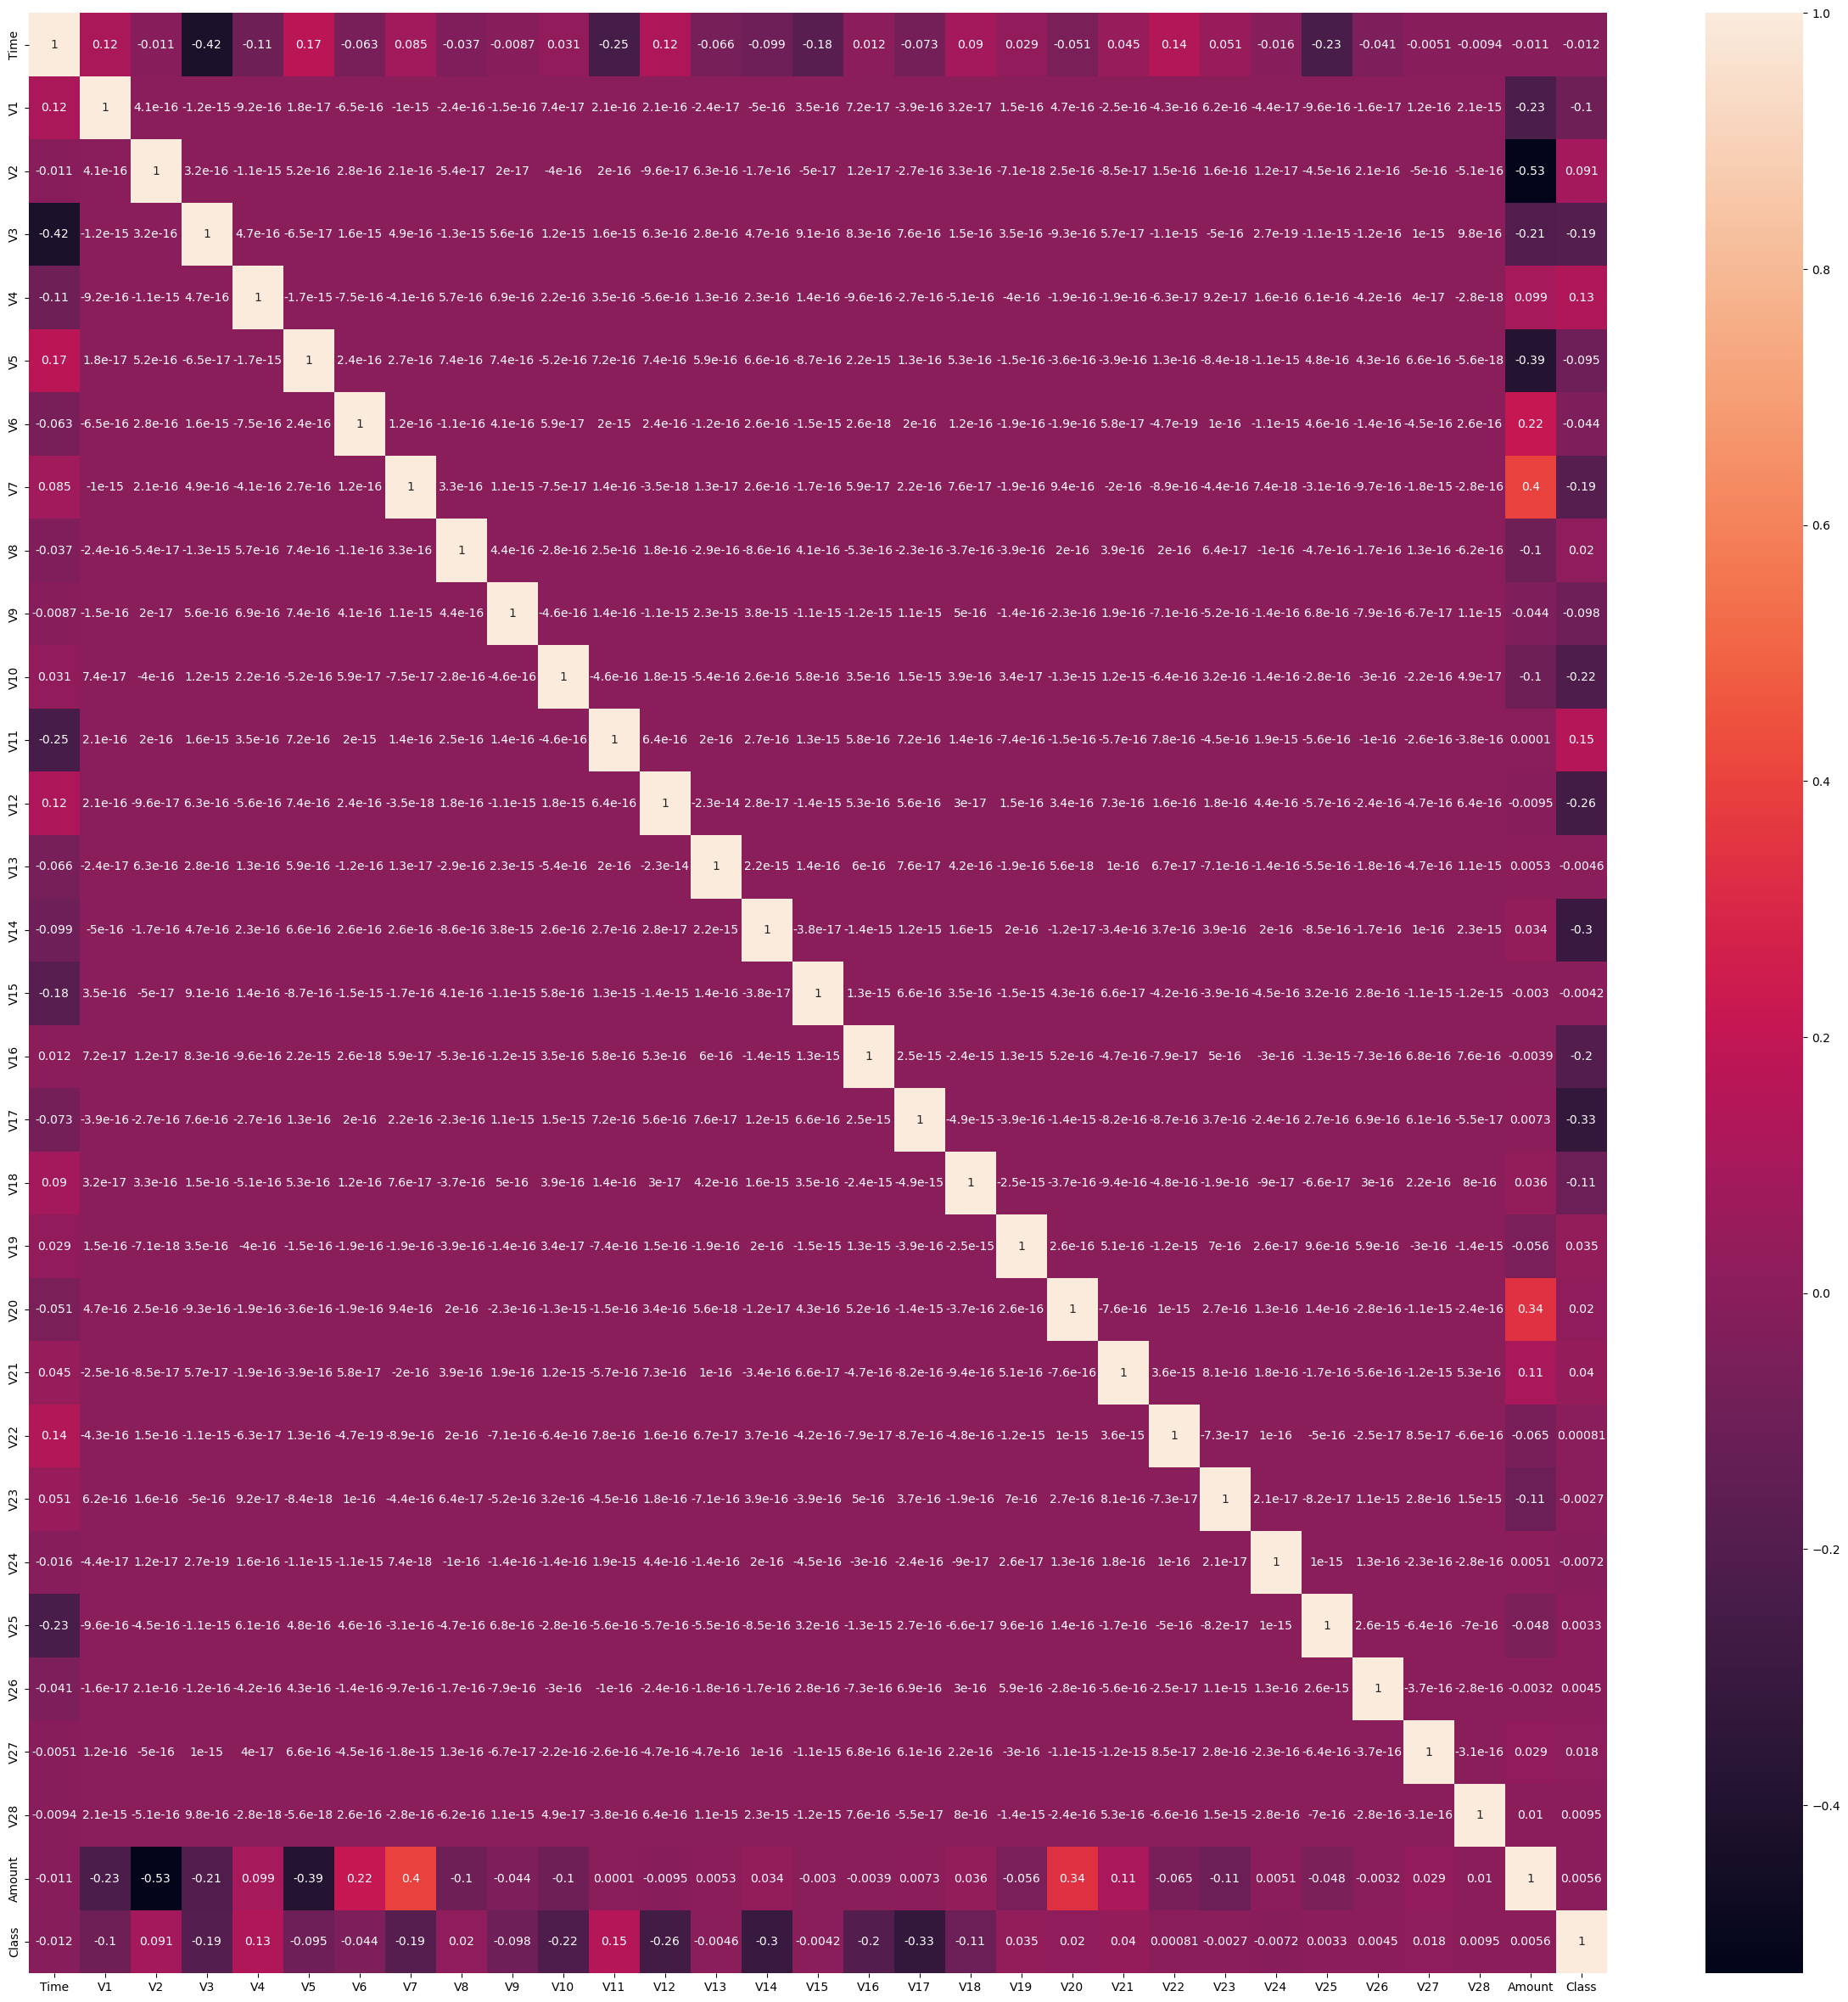

In [1762]:
credit_df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(credit_df.corr(),annot=True)

In [1763]:
# scaling of time and amount
# keep different copies scled  not scaled
#train-test
#pipline
#different algorithms
#evaluation


In [1764]:
X = credit_df.iloc[:,0:-1]
y = credit_df.iloc[:,-1]

In [1765]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [1766]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [1767]:
credit_df.columns.get_loc('Class')

30

### Train-Test Split

In [1768]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [1769]:
len(y_train[y_train==1]),len(y_train[y_train==0]),len(y_test[y_test==1]),len(y_test[y_test==0])

(408, 227437, 84, 56878)

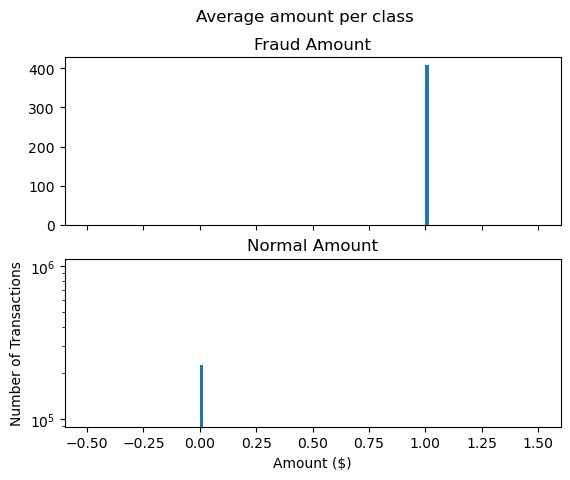

In [1770]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(y_train[y_train==1], bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(y_train[y_train==0] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

In [1771]:
from sklearn.tree import DecisionTreeClassifier

# Decion Tree on imbalaned data

In [1772]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import MinMaxScaler

## Scaling Time and Amount

In [1773]:
trf1 = ColumnTransformer([
    ('scale',MinMaxScaler(),[0,29])
],remainder='passthrough')

In [1774]:
trf2 = DecisionTreeClassifier()

In [1775]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [1776]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  [0, 29])])),
                ('trf2', DecisionTreeClassifier())])

In [1777]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [1778]:
y_pred = pipe.predict(X_test)

In [1779]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [1780]:
len(y_test),len(y_train)

(56962, 227845)

In [1781]:

accuracy_score(y_test,y_pred)

0.9992626663389628

In [1782]:
balanced_accuracy_score(y_test,y_pred)

0.8807589845601027

In [1783]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.74      0.76      0.75        84

    accuracy                           1.00     56962
   macro avg       0.87      0.88      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [1784]:
pipe.named_steps['trf1'].transformers_[0][1].feature_names_in_

array(['Time', 'Amount'], dtype=object)

# Cross Validation using Pipeline

In [1785]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.9991397660690382

# GridSearch using Pipeline

In [1786]:
# gridsearchcv
params = {
    'trf2__max_depth':[1,2,3,4,5,None]
}

In [1787]:
from sklearn.model_selection import GridSearchCV

In [1788]:
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         [0,
                                                                          29])])),
                                       ('trf2', DecisionTreeClassifier())]),
             param_grid={'trf2__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [1789]:
grid.best_score_

0.9994733261647173

In [1790]:
grid.best_params_

{'trf2__max_depth': 5}

# Logistic_Regression

In [1791]:
from sklearn.linear_model import LogisticRegression

In [1792]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [1793]:
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),[0,29])
],remainder='passthrough')

In [1794]:
trf4 = LogisticRegression()

In [1795]:
pipe = Pipeline([
    ('trf3',trf3),
    ('trf4',trf4)
])

In [1796]:
pipe.fit(X_train,y_train)

/Users/anubhoyar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  [0, 29])])),
                ('trf4', LogisticRegression())])

In [1797]:
y_pred = pipe.predict(X_test)

In [1798]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [1799]:
accuracy_score(y_test,y_pred)

0.9994557775359011

In [1800]:
balanced_accuracy_score(y_test,y_pred)

0.8570813219271323

In [1801]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.90      0.71      0.79        84

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [1802]:
pipe.named_steps['trf4']

LogisticRegression()

# IsolationForest

In [1803]:
from sklearn.ensemble import IsolationForest

In [1874]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [1888]:
iso_forest= IsolationForest(n_estimators=80, max_samples=100,contamination=float(0.0014),max_features=29) 

In [1889]:
iso_forest.fit(X_train,y_train)

IsolationForest(contamination=0.0014, max_features=29, max_samples=100,
                n_estimators=80)

In [1890]:
len(y_train[y_train==1]),len(y_train),len(y_test[y_test==1]),len(y_test[y_test==0])

(408, 227845, 84, 56878)

In [1891]:
y_pred= iso_forest.predict(X_test)

In [1892]:
X_test.shape

(56962, 30)

In [1893]:
y_pred.shape

(56962,)

In [1894]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [1895]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [1896]:
len(y_pred[y_pred==1]),len(y_pred[y_pred==0]),len(y_test[y_test==1]),len(y_test[y_test==0])

(79, 56883, 84, 56878)

In [1897]:
accuracy_score(y_test,y_pred)

0.9976299989466662

In [1898]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.18      0.17      0.17        84

    accuracy                           1.00     56962
   macro avg       0.59      0.58      0.59     56962
weighted avg       1.00      1.00      1.00     56962



In [1899]:
confusion_matrix(y_test, y_pred)

array([[56813,    65],
       [   70,    14]])

In [1900]:
n_errors = (y_pred != y_test).sum()
print("Isolation Forest have {} incorrect predictions.".format(n_errors))

Isolation Forest have 135 incorrect predictions.


## GridSearch

In [1818]:
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection

In [1819]:
# clf = IsolationForest()

# param_grid = {'n_estimators': [80,89,100], 
#               'max_samples': [100,200,227437], 
#               'contamination': [0.001], 
#               'max_features': [29], 
#               'bootstrap': [True, False], 
#               }

# f1sc = make_scorer(f1_score,average='macro')

# grid_dt_estimator = model_selection.GridSearchCV(clf, 
#                                                  param_grid,
#                                                  scoring=f1sc, 
#                                                  cv=3)
# grid_dt_estimator.fit(X_train, y_train)

# Oversampling

In [1821]:
count_class_0,count_class_1=credit_df['Class'].value_counts()
df_class_0=credit_df[credit_df['Class']==0]
df_class_1=credit_df[credit_df['Class']==1]

In [1822]:
count_class_0,count_class_1

(284315, 492)

In [1823]:
df_class1_over=df_class_1.sample(count_class_0,replace=True)

In [1824]:
credit_df_over=pd.concat([df_class_0,df_class1_over],axis=0)
credit_df_over.shape

(568630, 31)

In [1825]:
print('Random over-sampling')
print(credit_df_over['Class'].value_counts())

Random over-sampling
0    284315
1    284315
Name: Class, dtype: int64


In [1826]:
X_new = credit_df_over.iloc[:,0:-1]
y_new = credit_df_over.iloc[:,-1]

In [1827]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=5)

In [1828]:
y_train.value_counts()

0    227554
1    227350
Name: Class, dtype: int64

In [1829]:
trf11 = ColumnTransformer([
    ('scale',MinMaxScaler(),[0,29])
],remainder='passthrough')

## Decion Tree

In [1830]:
trf12 = DecisionTreeClassifier()

In [1831]:
pipe = Pipeline([
    ('trf11',trf11),
    ('trf12',trf12)
])

In [1832]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf11',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  [0, 29])])),
                ('trf12', DecisionTreeClassifier())])

In [1833]:
y_pred = pipe.predict(X_test)

In [1834]:
len(y_test),len(y_pred)

(113726, 113726)

In [1835]:
accuracy_score(y_test,y_pred)

0.9997537942071294

In [1836]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56761
           1       1.00      1.00      1.00     56965

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [1837]:
n_errors = (y_pred != y_test).sum()
print("Isolation Forest have {} incorrect predictions.".format(n_errors))

Isolation Forest have 28 incorrect predictions.


## Logistic regression

In [1838]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=5)

In [1839]:
y_train.value_counts()

0    227554
1    227350
Name: Class, dtype: int64

In [1840]:
trf13 = ColumnTransformer([
    ('scale',MinMaxScaler(),[0,29])
],remainder='passthrough')
trf14 = LogisticRegression()
pipe = Pipeline([
    ('trf13',trf13),
    ('trf14',trf14)
])

In [1841]:
pipe.fit(X_train,y_train)

/Users/anubhoyar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('trf13',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  [0, 29])])),
                ('trf14', LogisticRegression())])

In [1842]:
y_pred = pipe.predict(X_test)

In [1843]:
accuracy_score(y_test,y_pred)

0.9491936760283488

In [1844]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56761
           1       0.98      0.92      0.95     56965

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [1845]:
n_errors = (y_pred != y_test).sum()
print("Isolation Forest have {} incorrect predictions.".format(n_errors))

Isolation Forest have 5778 incorrect predictions.


## Isolation Forest  works on imbalaced data no need to balance

In [1846]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=5)

In [1847]:
y_train.value_counts()

0    227554
1    227350
Name: Class, dtype: int64

In [1848]:
iso_forest= IsolationForest(n_estimators=100, max_samples=len(X_train),random_state=0, verbose=0) 

In [1849]:
iso_forest.fit(X_train,y_train)

IsolationForest(max_samples=454904, random_state=0)

In [1850]:
y_pred= iso_forest.predict(X_test)

In [1851]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [1852]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [1853]:
accuracy_score(y_test,y_pred)

0.5118530503139124

In [1854]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.51      1.00      0.67     56761
           1       0.93      0.03      0.05     56965

    accuracy                           0.51    113726
   macro avg       0.72      0.51      0.36    113726
weighted avg       0.72      0.51      0.36    113726



In [1855]:
n_errors = (y_pred != y_test).sum()
print("Isolation Forest have {} incorrect predictions.".format(n_errors))

Isolation Forest have 55515 incorrect predictions.


# Local Outlier Factor

In [1856]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [1857]:
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier

In [1858]:
model_lof = LocalOutlierFactor(n_neighbors=4, contamination=0.0014, novelty=True)
model_lof.fit(X_train)

LocalOutlierFactor(contamination=0.0014, n_neighbors=4, novelty=True)

In [1859]:
y_pred= model_lof.predict(X_test)
y_pred

/Users/anubhoyar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [1860]:
len(y_pred[y_pred == 1]),len(y_pred[y_pred == -1]),len(y_pred[y_pred == 0])

(56889, 73, 0)

In [1861]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [1862]:
len(y_pred[y_pred == 1]),len(y_pred[y_pred == -1]),len(y_pred[y_pred == 0])

(73, 0, 56889)

In [1863]:
accuracy_score(y_test,y_pred)

0.997489554439802

In [1864]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.10      0.08      0.09        84

    accuracy                           1.00     56962
   macro avg       0.55      0.54      0.54     56962
weighted avg       1.00      1.00      1.00     56962



In [1865]:
n_errors = (y_pred != y_test).sum()
print("Isolation Forest have {} incorrect predictions.".format(n_errors))

Isolation Forest have 143 incorrect predictions.


# K Neared Neighbour

In [1866]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [1867]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X=X_train, y=y_train)


KNeighborsClassifier(n_neighbors=3)

In [1868]:
y_pred= model_knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [1869]:
len(y_pred[y_pred == 1]),len(y_pred[y_pred == -1]),len(y_pred[y_pred == 0])

(11, 0, 56951)

In [1870]:
accuracy_score(y_test,y_pred)

0.9986833327481479

In [1871]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.91      0.12      0.21        84

    accuracy                           1.00     56962
   macro avg       0.95      0.56      0.60     56962
weighted avg       1.00      1.00      1.00     56962



In [1872]:
n_errors = (y_pred != y_test).sum()
print("Isolation Forest have {} incorrect predictions.".format(n_errors))

Isolation Forest have 75 incorrect predictions.


In [1901]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score   
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [1902]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(C=1,solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [1906]:
clfs={
    'SVC':svc,
    'KN':knc,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [1907]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [1908]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9985253326779256
Precision -  0.0
For  KN
Accuracy -  0.9986482216214319
Precision -  1.0
For  DT
Accuracy -  0.9995259997893332
Precision -  0.8904109589041096
For  LR
Accuracy -  0.9994557775359011
Precision -  0.8955223880597015
For  RF
Accuracy -  0.9996488887328394
Precision -  0.9324324324324325
For  AdaBoost
Accuracy -  0.999420666409185
Precision -  0.7931034482758621
For  Bgc
Accuracy -  0.9995962220427653
Precision -  0.9178082191780822
For  ETC
Accuracy -  0.9996839998595555
Precision -  0.9459459459459459
For  GBDT
Accuracy -  0.999403110845827
Precision -  0.8472222222222222
For  xgb
Accuracy -  0.9996313331694814
Precision -  0.9315068493150684


In [1909]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [1910]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.998648,1.000000
7,ETC,0.999684,0.945946
4,RF,0.999649,0.932432
9,xgb,0.999631,0.931507
6,Bgc,0.999596,0.917808
3,LR,0.999456,0.895522
2,DT,0.999526,0.890411
8,GBDT,0.999403,0.847222
5,AdaBoost,0.999421,0.793103
0,SVC,0.998525,0.000000


In [1913]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.998648
1,ETC,Accuracy,0.999684
2,RF,Accuracy,0.999649
3,xgb,Accuracy,0.999631
4,Bgc,Accuracy,0.999596
5,LR,Accuracy,0.999456
6,DT,Accuracy,0.999526
7,GBDT,Accuracy,0.999403
8,AdaBoost,Accuracy,0.999421
9,SVC,Accuracy,0.998525


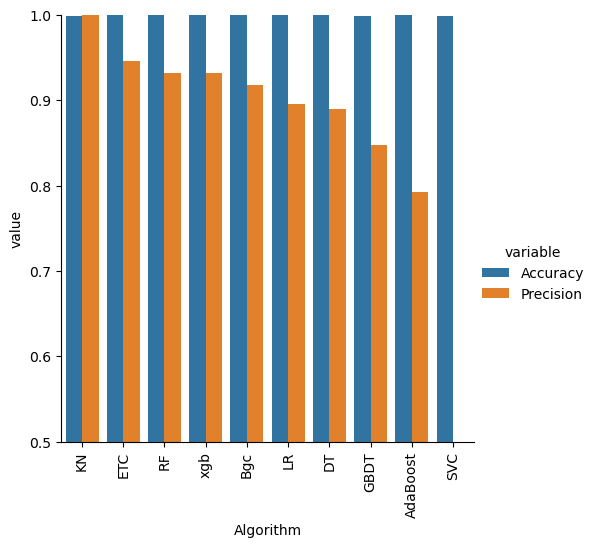

In [1915]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()